In [150]:
# Importa Bibliotecas.
import numpy as np
import pandas as pd
import seaborn as seb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics, linear_model
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [151]:
# Carrega Dataset.
df_Traffic_Brazil = pd.read_csv("traffic_brazil.csv", encoding = 'utf-8', delimiter = ';') 

In [152]:
# Análise exploratória dos dados.
df_Traffic_Brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
Hour (Coded)                             135 non-null int64
Immobilized bus                          135 non-null int64
Broken Truck                             135 non-null int64
Vehicle excess                           135 non-null int64
Accident victim                          135 non-null int64
Running over                             135 non-null int64
Fire vehicles                            135 non-null int64
Occurrence involving freight             135 non-null int64
Incident involving dangerous freight     135 non-null int64
Lack of electricity                      135 non-null int64
Fire                                     135 non-null int64
Point of flooding                        135 non-null int64
Manifestations                           135 non-null int64
Defect in the network of trolleybuses    135 non-null int64
Tree on the road                         135 non-null i

In [153]:
df_Traffic_Brazil.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000


In [154]:
df_Traffic_Brazil.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


In [155]:
# Limpa valores nulos.
df_Traffic_Brazil = df_Traffic_Brazil.dropna()

## 1.Em quais horários o trânsito apresenta maior lentidão?

In [156]:
# Converte os valores de "Slowness in traffic" para numérico.
df_Traffic_Brazil["Slowness in traffic (%)"] = df_Traffic_Brazil["Slowness in traffic (%)"].apply(lambda x: pd.to_numeric(x.replace(",",".")))

In [157]:
# Converte os valores de Horas de acordo com seus códigos.
df_Traffic_Brazil["Hour (Coded)"] = df_Traffic_Brazil["Hour (Coded)"].apply(lambda x: int(((x-1) * 0.5) + 7))

In [158]:
# Renomeia Colunas
df_Traffic_Brazil = df_Traffic_Brazil.rename(columns = {"Hour (Coded)": "Hora", 
                                                        "Slowness in traffic (%)":"Lentidão no trânsito (%)",
                                                        "Lack of electricity": "Falta de eletricidade",
                                                        "Point of flooding": "Ponto de inundação"
                                                       }) 

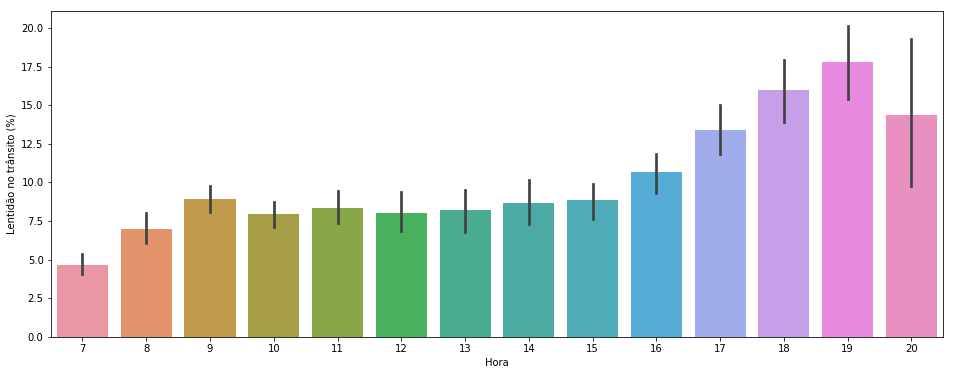

In [159]:
# Cria gráfico de barras com relação entre "Temperatura" e "CO".
plt.figure(figsize=(16, 6))
seb.barplot(x="Hora", y="Lentidão no trânsito (%)", data=df_Traffic_Brazil[["Hora","Lentidão no trânsito (%)"]], estimator=np.mean)

## A maior lentidão se concentra entre as 17:00 e 19:00 horas.

## 2.Quais os fatores que provocam maior lentidão?

In [160]:
# Analisa as correlações absolutas supeiores a 0.4 entre a Lentidão e os demais atributos.
df_Traffic_Brazil.corr()["Lentidão no trânsito (%)"][df_Traffic_Brazil.corr()["Lentidão no trânsito (%)"] > abs(0.4)]

Hora                        0.727847
Falta de eletricidade       0.436569
Ponto de inundação          0.420016
Lentidão no trânsito (%)    1.000000
Name: Lentidão no trânsito (%), dtype: float64

## Logo, os fatores que mais provocam lentidão de forma considerável são, nesta ordem: Hora, Falta de eletricidade e Ponto de inundação.

## 3.Apresente os pesos obtidos pela execução de uma regressão linear. Estes pesos confirmam os gráficos obtidos no item anterior?

In [869]:
# Separa apenas colunas da predição.
df_Traffic_Brazil = df_Traffic_Brazil[["Hora","Lentidão no trânsito (%)"]]

In [870]:
# Divide o dataset entre treino e teste.
x_train, x_test, y_train, y_test = train_test_split(df_Traffic_Brazil["Hora"], df_Traffic_Brazil["Lentidão no trânsito (%)"], test_size=0.03)

In [871]:
# Preprocessamento dos dados.
label_encod = preprocessing.LabelEncoder()

x_train = label_encod.fit_transform(x_train).reshape(-1, 1)
y_train = label_encod.fit_transform(y_train).reshape(-1, 1)

x_test = label_encod.fit_transform(x_test).reshape(-1, 1)
y_test = label_encod.fit_transform(y_test).reshape(-1, 1)

In [872]:
# Instancia modelo de Regressão Linear do sklearn.
reg_lin = linear_model.LinearRegression()

In [873]:
# Treina o modelo.
reg_lin.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [874]:
# Utiliza modelo treinado para a predição.
y_pred = reg_lin.predict(x_test)

In [875]:
print("Acurácia Regressão Linear: %.1f %%" % (reg_lin.score(y_test, y_pred)*100))

Acurácia Regressão Linear: 61.5 %


## Os "pesos" obtidos pelo modelo linear são:

In [876]:
print("Coeficiente Angular: %.1f" % (reg_lin.coef_))

Coeficiente Angular: 3.9


In [877]:
print("Coeficiente Linear: %.1f" % (reg_lin.intercept_))

Coeficiente Linear: 13.1


## Que resultaria na Função F'(x) a seguir:

In [878]:
print("F'(x) = y = %.1fx + %.1f" % (reg_lin.coef_, reg_lin.intercept_))

F'(x) = y = 3.9x + 13.1


## 4.Compare os resultados obtidos no item anterior com o KNN.

In [879]:
# Instancia modelo KNN do sklearn.
knn = KNeighborsClassifier(n_neighbors=3)

In [880]:
# Treina o modelo.
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [881]:
# Utiliza modelo treinado para a predição.
y_pred = knn.predict(x_test)

In [882]:
print("Acurácia Regressão Linear: %.1f %%" % (reg_lin.score(y_test, y_pred)*100))

Acurácia Regressão Linear: 31.8 %


## O Modelo de KNN apresentou acurácia inferior ao modelo de Regressão Linear.